# Proyek Analisis Data: [Air Quality]
- **Nama:** Zahwa Fadilla
- **Email:** m142d4kx2217@bangkit.academy
- **ID Dicoding:** M142D4KX2217

## Menentukan Pertanyaan Bisnis

- Bagaimana cara membandingkan CO antara stasiun cuaca pada Air Quality ?
- Apa korelasi antar variabel padaAir Quality pada data tersebut?

## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

In [20]:
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#DataFrames
dfs = {}

### Gathering Data

In [22]:
import os

In [23]:
dataframes = {}

In [24]:
data_dir = '/content/drive/MyDrive/data mining/PRSA_Data_20130301-20170228/'

In [25]:
df_path = '/content/drive/MyDrive/data mining/PRSA_Data_20130301-20170228/'
# Load CSV files into DataFrames
for files in os.listdir(df_path):
    parts = os.path.splitext(files)[0].split("_")
    if len(parts) >= 3:
        df_name = parts[2]  # Use file name without extension as DataFrame name
        dataframes[df_name] = pd.read_csv(os.path.join(df_path, files)).drop(['No'], axis=1)
    else:
        print(f"File {files} has an unexpected format and will be skipped.")


File merged_data.csv has an unexpected format and will be skipped.


In [26]:
merged_data = pd.concat(dataframes.values(), ignore_index=True)

In [27]:
merged_data.to_csv('/content/drive/MyDrive/data mining/PRSA_Data_20130301-20170228/merged_data.csv', index=False)

In [28]:
dataframes['Wanliu'].head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [29]:
dataframes['Wanliu'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34682 non-null  float64
 5   PM10     34780 non-null  float64
 6   SO2      34489 non-null  float64
 7   NO2      33994 non-null  float64
 8   CO       33252 non-null  float64
 9   O3       32957 non-null  float64
 10  TEMP     35044 non-null  float64
 11  PRES     35044 non-null  float64
 12  DEWP     35044 non-null  float64
 13  RAIN     35044 non-null  float64
 14  wd       34941 non-null  object 
 15  WSPM     35050 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB


In [30]:
dataframes['Shunyi'].head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### Assessing Data

In [31]:
for df_name, df in dataframes.items():
  print(df_name, ' | ', df)

Guanyuan  |         year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0      2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1      2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2      2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3      2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4      2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   
...     ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
35059  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0  12.5   
35060  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0  11.6   
35061  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0  10.8   
35062  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0  10.5   
35063  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   8.6   

         PRES  DEWP  RAIN   wd  WSPM   station  
0      1023.0

In [32]:
# Create a function to combine date and time columns
def combine_datetime(dataframes):
    dataframes['datetime'] = pd.to_datetime(dataframes[['year', 'month', 'day', 'hour']])
    dataframes.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return dataframes

# Iterate through DataFrames and apply the combine_datetime function
for df_name, df in dataframes.items():
    dataframes[df_name] = combine_datetime(df)

In [33]:
# Looking for the sum of missing values in dataframe
dataframes['Shunyi'].isna().sum()

PM2.5        913
PM10         548
SO2         1296
NO2         1365
CO          2178
O3          1489
TEMP          51
PRES          51
DEWP          54
RAIN          51
wd           483
WSPM          44
station        0
datetime       0
dtype: int64

In [34]:
# Check missing values
missing_df = {}

for df_name, df in dataframes.items():
  missing_df[df_name] = df.isna().sum()

pd.DataFrame(missing_df).transpose() # We turn it into dataframe and make it transpose so it will be looked better

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Guanyuan,616,429,474,659,1753,1173,20,20,20,20,81,14,0,0
Dongsi,750,553,663,1601,3197,664,20,20,20,20,78,14,0,0
Gucheng,646,381,507,668,1401,729,51,50,51,43,159,42,0,0
Aotizhongxin,925,718,935,1023,1776,1719,20,20,20,20,81,14,0,0
Huairou,953,777,980,1639,1422,1151,51,53,53,55,302,49,0,0
Dingling,779,656,730,1234,2012,1214,53,50,53,51,140,43,0,0
Changping,774,582,628,667,1521,604,53,50,53,51,140,43,0,0
Shunyi,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0,0
Wanshouxigong,696,484,669,754,1297,1078,19,19,19,19,79,13,0,0
Wanliu,382,284,575,1070,1812,2107,20,20,20,20,123,14,0,0


In [35]:
# Create a function that will check the duplicate of data
duplicated_df = {}

for df_name, df in dataframes.items():
  duplicated_df[df_name] = df.duplicated().sum()

pd.DataFrame.from_dict(duplicated_df, orient = 'index', columns = ['Duplicated DF'])

,Duplicated DF
Guanyuan,0
Dongsi,0
Gucheng,0
Aotizhongxin,0
Huairou,0
Dingling,0
Changping,0
Shunyi,0
Wanshouxigong,0
Wanliu,0


In [36]:
# Checking all dataset dtypes
dtypes_df = {}

for df_name, df in dataframes.items():
  dtypes_df[df_name] = df.dtypes

pd.DataFrame(dtypes_df).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Guanyuan,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Dongsi,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Gucheng,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Aotizhongxin,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Huairou,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Dingling,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Changping,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Shunyi,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Wanshouxigong,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Wanliu,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]


### Cleaning Data

In [37]:
# Handle the missing values with mean
# For now we're using median, we can also use mean

median_df = {}

for df_name, df in dataframes.items():
  column_numeric = df.select_dtypes(include = ['number']).columns.difference(['No'])
  median_df[df_name] = df[column_numeric].mean()

for df_name, df in dataframes.items():
  column_numeric = df.select_dtypes(include = ['number']).columns.difference(['No'])
  df[column_numeric] = df[column_numeric].fillna(median_df[df_name])


In [38]:
dataframes['Shunyi'].isna().sum()

PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd          483
WSPM          0
station       0
datetime      0
dtype: int64

In [39]:
for df_name, df in dataframes.items():
  df['wd'].fillna(method = 'ffill', inplace = True)

In [40]:
dataframes['Shunyi'].isna().sum()

PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [41]:
# Concatenate all DataFrames into one DataFrame along the rows
concated_df = pd.concat(list(dataframes.values()), axis=0)

# Reset the index of the combined DataFrame
concated_df.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis (EDA)

In [42]:
concated_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.780235,104.578547,15.820683,50.583319,1230.62509,57.349235,13.538931,1010.746341,2.490654,0.064475,1.729701
std,79.984694,91.075152,21.420157,34.677400,1131.69545,55.767436,11.430737,10.469404,13.787251,0.820624,1.245924
min,2.000000,2.000000,0.285600,1.026500,100.00000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,21.000000,36.000000,3.000000,24.000000,500.00000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,57.000000,83.739723,8.000000,44.000000,900.00000,47.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,109.000000,144.000000,19.000000,70.000000,1500.00000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.00000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [43]:
concated_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01 00:00:00
1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01 01:00:00
2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01 02:00:00
3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01 03:00:00
4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01 04:00:00


In [44]:
print(type(concated_df))

<class 'pandas.core.frame.DataFrame'>


In [45]:
pm25_range = [12, 35.4, 55.4, 150.4, 250.4, float('inf')]
pm10_range = [54, 124, 254, 354, 424, float('inf')]
so2_range = [35, 75, 185, 304, 604, float('inf')]
no2_range = [53, 100, 360, 649, 1249, float('inf')]
co_range = [4400, 9400, 12400, 15400, 30400, float('inf')]
o3_range = [54, 70, 85, 105, 200, float('inf')]

air_quality_index = ['Good', 'Moderate', 'Unhealthy for Sensitive Group', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

def factor_category(factor_values, factor_range):
  #print(factor_values)
  for range in factor_range:
    #print(range)
    if factor_values <= range:
      return factor_range.index(range)

concated_df['Category'] = concated_df.apply(lambda row: air_quality_index[max(
    factor_category(row['PM2.5'], pm25_range),
    factor_category(row['PM10'], pm10_range),
    factor_category(row['SO2'], so2_range),
    factor_category(row['NO2'], no2_range),
    factor_category(row['CO'], co_range),
    factor_category(row['O3'], o3_range),
)], axis=1)

In [46]:
concated_df.sample(10)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Category
365282,190.0,190.0,3.0,46.0,2200.0,2.0,9.0,1016.0,8.1,0.0,WNW,0.8,Tiantan,2014-11-01 02:00:00,Very Unhealthy
281145,206.0,262.0,23.0,68.0,2000.0,2.0,10.3,1003.2,4.6,0.0,ENE,3.5,Wanshouxigong,2013-03-27 09:00:00,Very Unhealthy
152583,152.0,171.0,36.0,28.0,1500.0,364.0,35.5,996.5,16.3,0.0,SSW,4.0,Huairou,2014-07-27 15:00:00,Hazardous
287949,184.0,238.0,77.0,104.0,3200.0,1.0,-4.1,1014.5,-6.4,0.0,W,0.8,Wanshouxigong,2014-01-04 21:00:00,Very Unhealthy
259812,223.0,223.0,3.0,63.0,1500.0,26.0,17.5,1014.2,13.0,0.0,SSE,3.0,Shunyi,2014-10-20 12:00:00,Very Unhealthy
367568,11.0,15.0,20.0,39.0,500.0,42.0,-1.0,1031.0,-17.3,0.0,NNW,3.6,Tiantan,2015-02-04 08:00:00,Good
226470,9.0,34.0,3.0,17.0,400.0,38.0,-4.8,1021.0,-22.3,0.0,WNW,3.9,Changping,2014-12-31 06:00:00,Good
34787,3.0,5.0,2.0,18.0,300.0,72.0,2.4,1029.3,-25.2,0.0,NW,3.4,Guanyuan,2017-02-17 11:00:00,Unhealthy for Sensitive Group
108292,57.0,43.0,3.0,21.0,400.0,122.0,23.7,996.3,23.4,0.0,NE,2.3,Aotizhongxin,2013-07-08 04:00:00,Very Unhealthy
98150,203.0,203.0,23.0,22.0,1400.0,183.0,24.1,992.0,14.8,0.0,SSW,2.4,Gucheng,2016-05-11 14:00:00,Very Unhealthy


In [47]:
concated_df[["station", "PM2.5"]].groupby(by="station").describe()

PM2.5                                                     
                 count       mean        std  min   25%   50%    75%    max
station                                                                    
Aotizhongxin   35064.0  82.773611  81.045038  3.0  23.0  61.0  112.0  898.0
Changping      35064.0  71.099743  71.524179  2.0  18.0  48.0   98.0  882.0
Dingling       35064.0  65.989497  71.460423  3.0  14.0  42.0   91.0  881.0
Dongsi         35064.0  86.194297  85.644198  3.0  23.0  63.0  117.0  737.0
Guanyuan       35064.0  82.933372  80.219412  2.0  24.0  61.0  113.0  680.0
Gucheng        35064.0  83.852089  82.030179  2.0  25.0  61.0  114.0  770.0
Huairou        35064.0  69.626367  70.250314  2.0  18.0  48.0   96.0  762.0
Nongzhanguan   35064.0  84.838483  85.449681  2.0  23.0  60.0  114.0  844.0
Shunyi         35064.0  79.491602  80.167173  2.0  20.0  57.0  109.0  941.0
Tiantan        35064.0  82.164911  80.136357  3.0  23.0  60.0  112.0  821.0
Wanliu         35064.0  83.374716  81.458179  2.0  24.0  60.0  115.0  957.0
Wanshouxigong  35064.0  85.024136  85.118393  3.0  23.0  62.0  115.0  999.0

In [48]:
# Make a back up dataframe for encoding with custom values
concated_df_copy = concated_df.copy()

In [49]:
concated_df_copy['Category'] = concated_df_copy['Category'].replace({'Good': 1, 'Moderate': 2, 'Unhealthy for Sensitive Group': 3, 'Unhealthy': 4, 'Very Unhealthy': 5, 'Hazardous': 6})



In [50]:
concated_df_copy.sample(10)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Category
326800,13.0,13.0,6.000000,10.0,300.0,122.0,30.6,1001.0,15.1,0.0,ENE,0.4,Wanliu,2014-06-11 16:00:00,5
382090,187.0,198.0,12.000000,125.0,1800.0,19.0,19.6,1011.5,12.6,0.0,NE,1.1,Tiantan,2016-10-01 10:00:00,5
401008,79.0,160.0,21.000000,74.0,1100.0,40.0,8.0,1013.0,-4.8,0.0,SSW,1.7,Nongzhanguan,2014-11-28 16:00:00,4
47367,76.0,76.0,14.000000,17.0,1000.0,222.0,34.6,1003.1,16.0,0.0,SW,4.9,Dongsi,2014-07-26 15:00:00,6
214734,15.0,51.0,1.000000,45.0,400.0,17.0,24.1,992.4,10.0,0.0,WNW,2.9,Changping,2013-08-29 06:00:00,2
294254,16.0,16.0,17.148603,20.0,500.0,75.0,25.9,1007.8,14.0,0.0,SE,1.2,Wanshouxigong,2014-09-24 14:00:00,3
303110,49.0,49.0,6.000000,52.0,1800.0,37.0,17.2,1019.8,14.3,0.0,E,0.4,Wanshouxigong,2015-09-28 14:00:00,3
47854,40.0,40.0,5.000000,68.0,900.0,77.0,23.6,1002.7,19.3,0.0,E,1.0,Dongsi,2014-08-15 22:00:00,3
74656,17.0,41.0,4.000000,25.0,500.0,126.0,26.3,1004.8,14.1,0.0,SSW,1.1,Gucheng,2013-09-05 16:00:00,5
347607,135.0,186.0,3.000000,156.0,1500.0,10.0,18.3,1006.3,9.4,0.0,SSW,1.6,Wanliu,2016-10-25 15:00:00,4


In [51]:
corr_of_col = concated_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']]
korelasi = corr_of_col.corr()
print(korelasi)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.879403  0.477780  0.658936  0.768866 -0.147605 -0.129770   
PM10   0.879403  1.000000  0.458736  0.646260  0.686963 -0.110404 -0.095537   
SO2    0.477780  0.458736  1.000000  0.492662  0.525420 -0.162966 -0.318315   
NO2    0.658936  0.646260  0.492662  1.000000  0.689799 -0.464562 -0.274364   
CO     0.768866  0.686963  0.525420  0.689799  1.000000 -0.305688 -0.318001   
O3    -0.147605 -0.110404 -0.162966 -0.464562 -0.305688  1.000000  0.586002   
TEMP  -0.129770 -0.095537 -0.318315 -0.274364 -0.318001  0.586002  1.000000   
PRES   0.018710 -0.017407  0.220974  0.173893  0.183570 -0.439454 -0.813277   
DEWP   0.113480  0.069672 -0.264086 -0.031358 -0.055777  0.308056  0.820114   
RAIN  -0.014151 -0.026379 -0.040072 -0.043521 -0.012976  0.023192  0.037635   

           PRES      DEWP      RAIN  
PM2.5  0.018710  0.113480 -0.014151  
PM10  -0.017407  0.069672 -0.026379  
SO2    0.220974 

In [52]:
# Specify the path where to save the CSV file
output_csv_path = "/content/drive/MyDrive/data mining/concated_df.csv"

# Save the combined DataFrame to a CSV file
concated_df.to_csv(output_csv_path, index=False)

In [53]:
output_csv_path = "/content/drive/MyDrive/data mining/categoric_combined_df.csv"

# Save the combined DataFrame to a CSV file
concated_df_copy.to_csv(output_csv_path, index=False)

### Explore ...

## Visualization & Explanatory Analysis

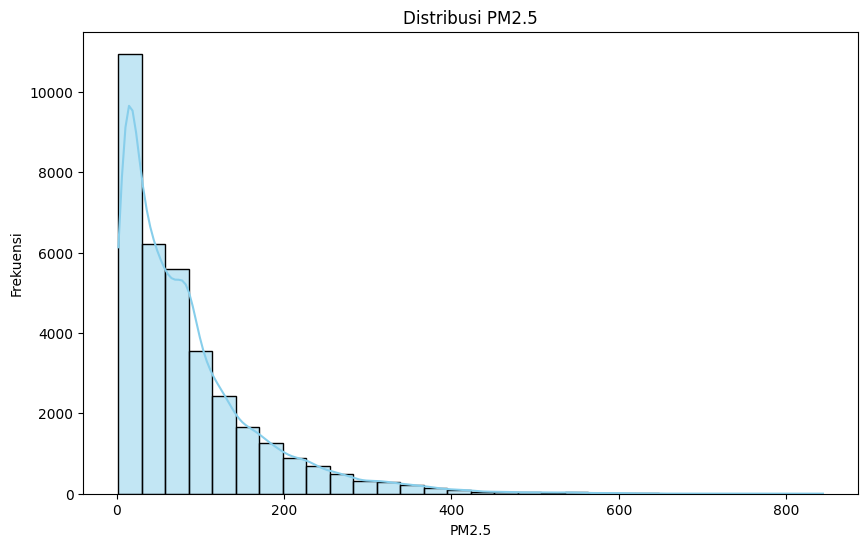

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PM2.5'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

In [55]:
category_percentage = {}
for station in concated_df.station.unique():
  count = (concated_df[concated_df['station'] == station]
           .Category
           .value_counts())
  sum = (concated_df[concated_df['station'] == station]
         .Category
         .value_counts()
         .sum())

  percen = count/sum * 100
  category_percentage[station] = percen.reset_index().rename(columns={'Category':'Percen', 'index':'Category'})

#category_percentage['Aotizhongxin']['Percen']

#category_percentage['Aotizhongxin']

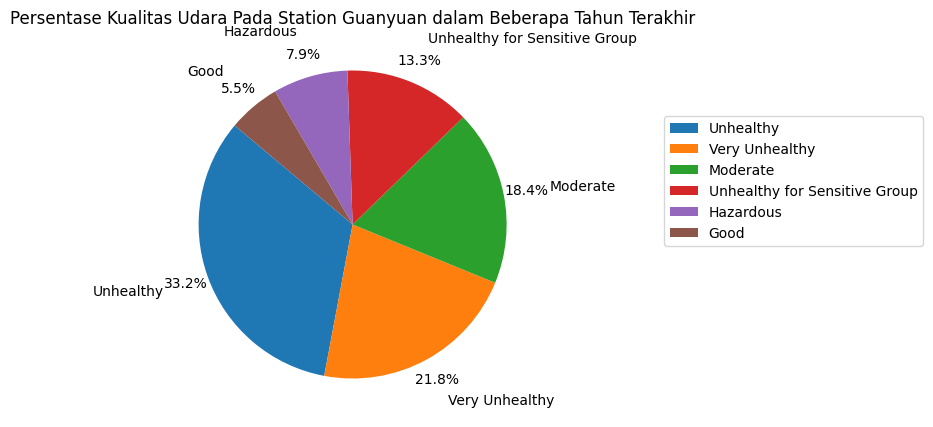

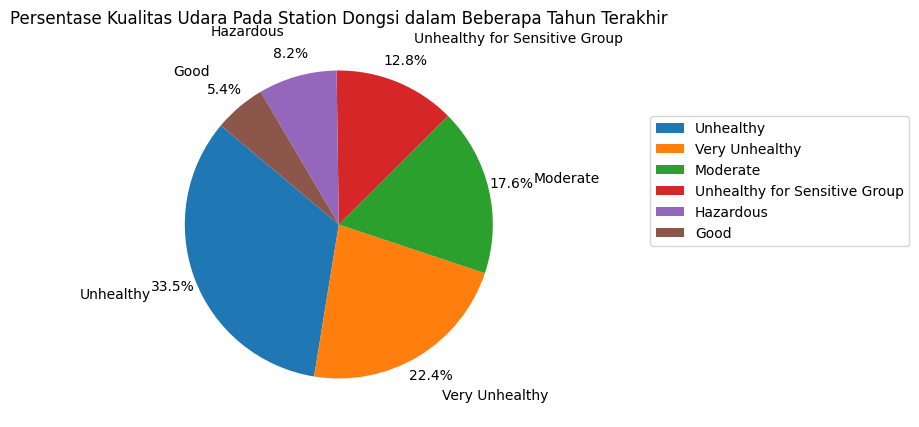

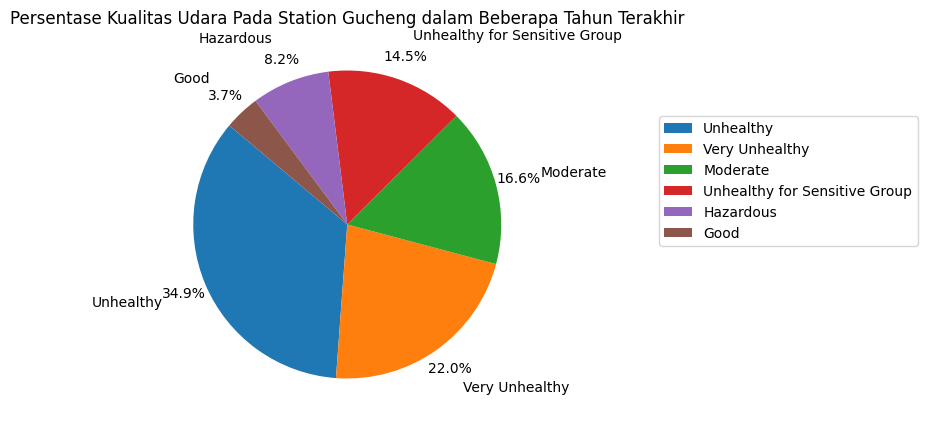

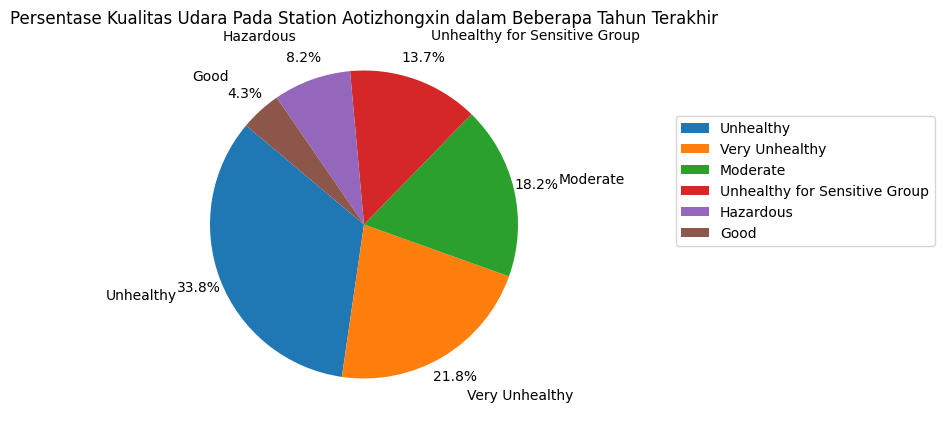

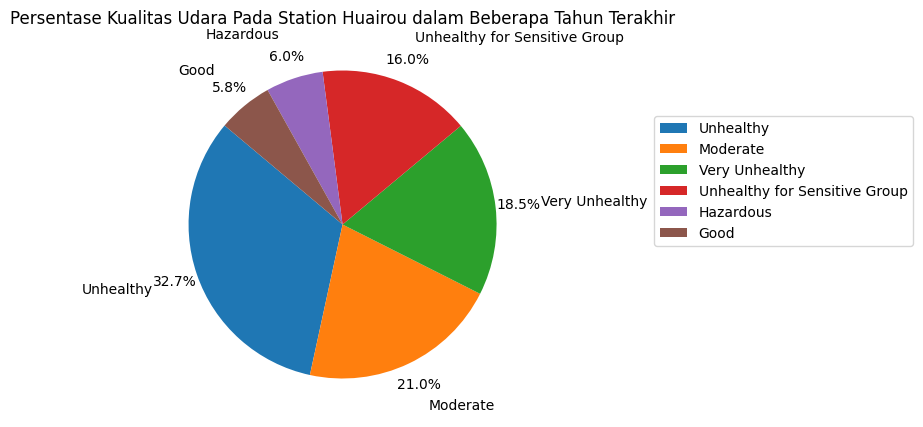

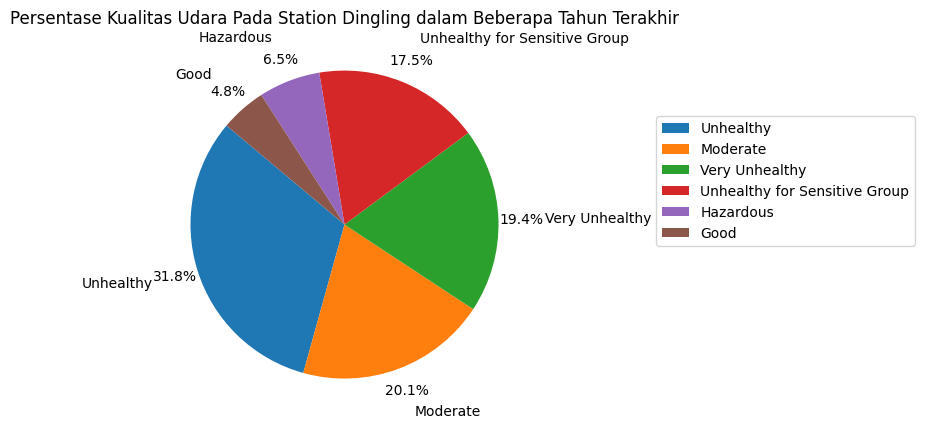

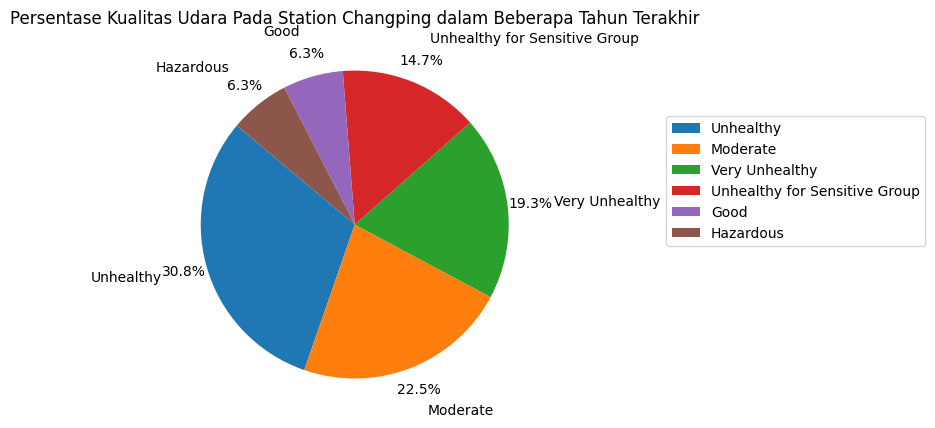

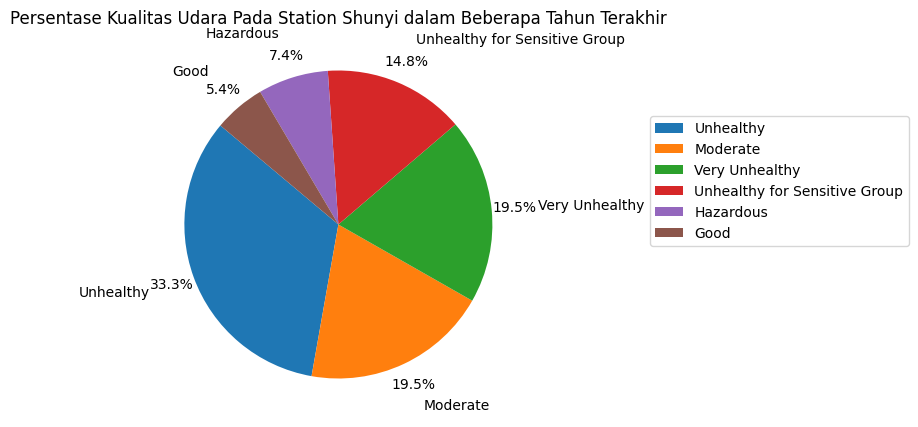

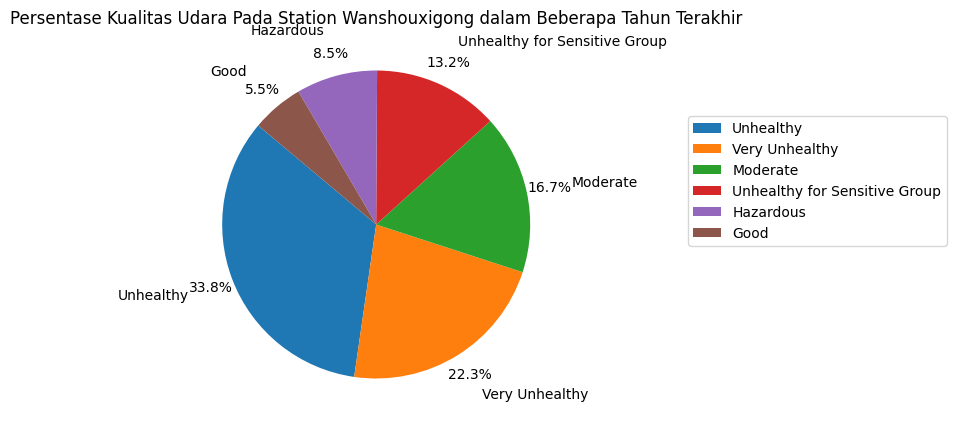

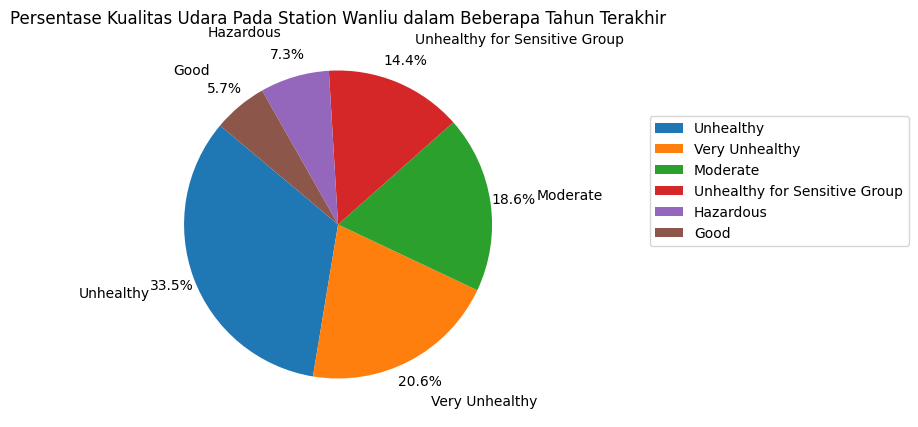

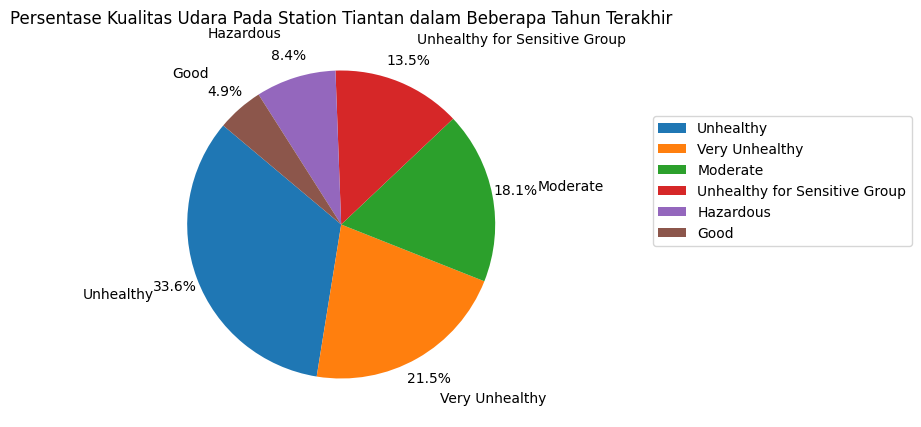

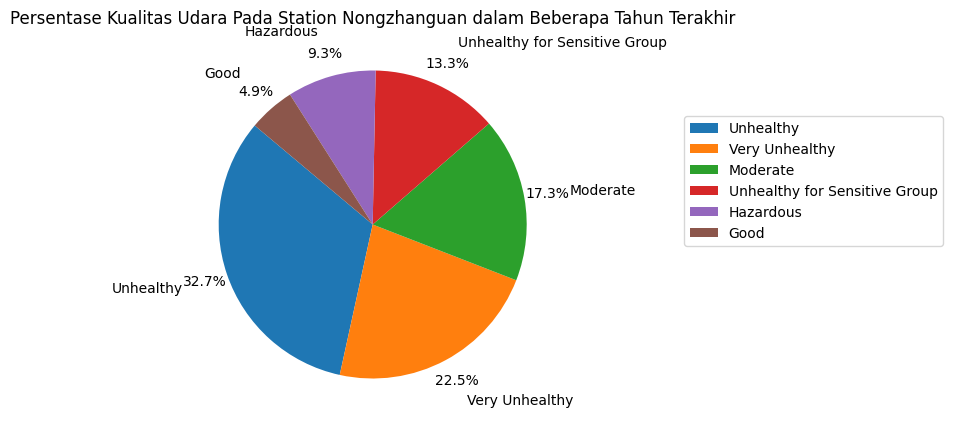

In [56]:
# Loop through each subplot and create a pie chart
for station in concated_df.station.unique():
    plt.figure(figsize=(5, 5))
    plt.pie(category_percentage[station]['Percen'],
            labels=category_percentage[station]['Category'],
            autopct='%1.1f%%',
            pctdistance=1.15,
            labeldistance=1.3,
            startangle=140)
    plt.title(f'Persentase Kualitas Udara Pada Station {station} dalam Beberapa Tahun Terakhir')
    plt.legend(category_percentage[station]["Category"], bbox_to_anchor=(2, 0.8), loc="upper right")

plt.show()


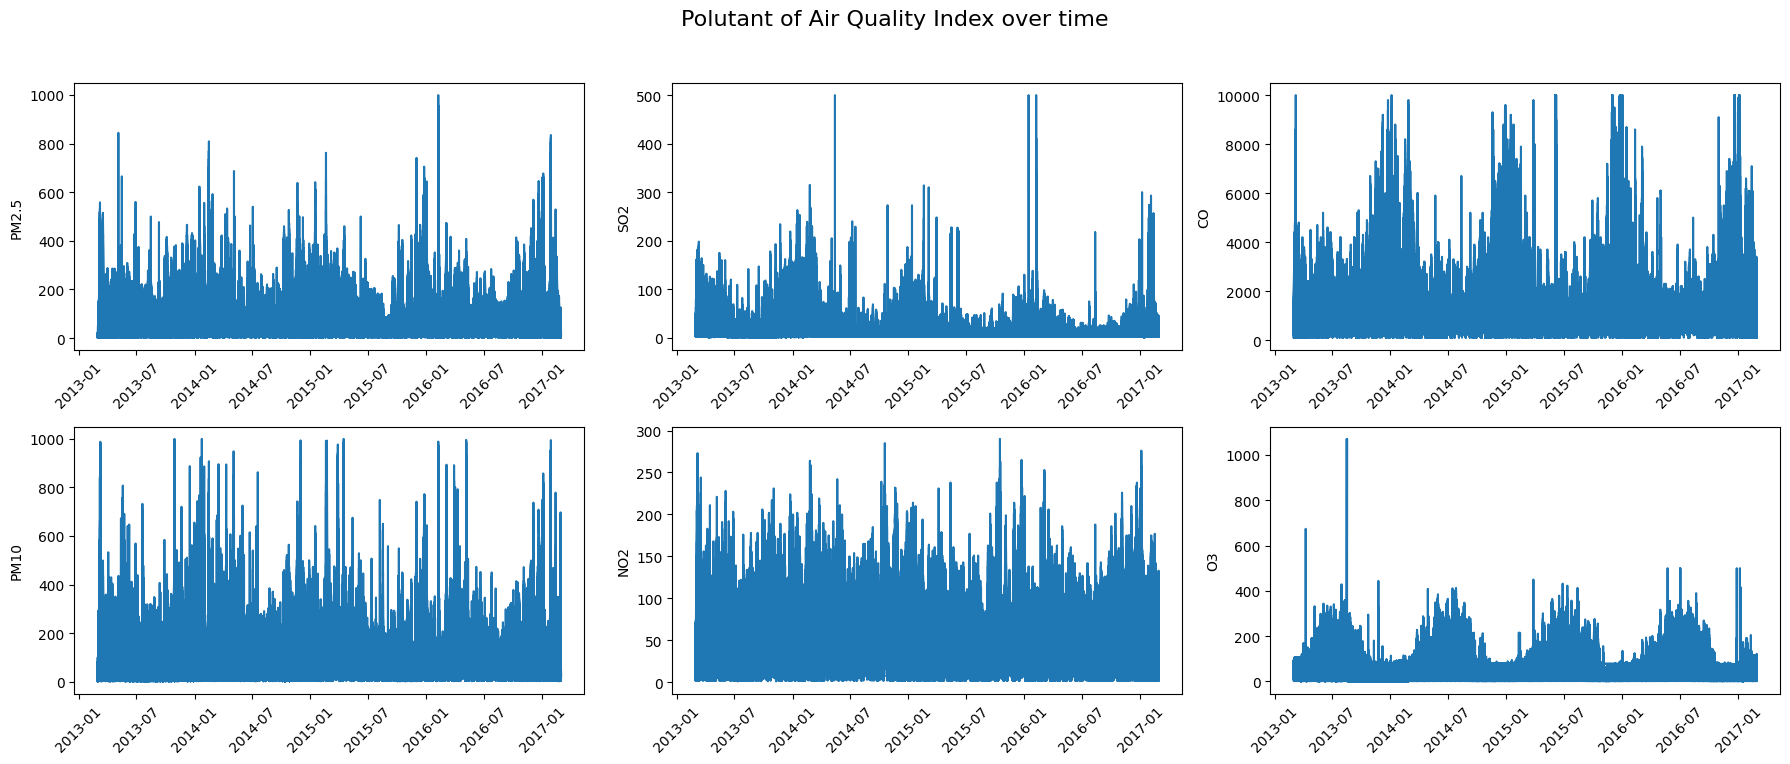

In [57]:
# Creating a plot for each polutant
figur, axes = plt.subplots(2, 3, figsize=(18,8))
figur.suptitle('Polutant of Air Quality Index over time', fontsize=16)

factors = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for n, factor in enumerate(factors):
  row = n%2
  col = n//2
  axes[row, col].plot(concated_df['datetime'], concated_df[factor], linestyle='-')
  axes[row, col].tick_params(axis='x', rotation=45)
  axes[row, col].set_ylabel(factor)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Bagaimana cara membandingkan CO antara stasiun cuaca pada Air Quality ?

<Axes: >

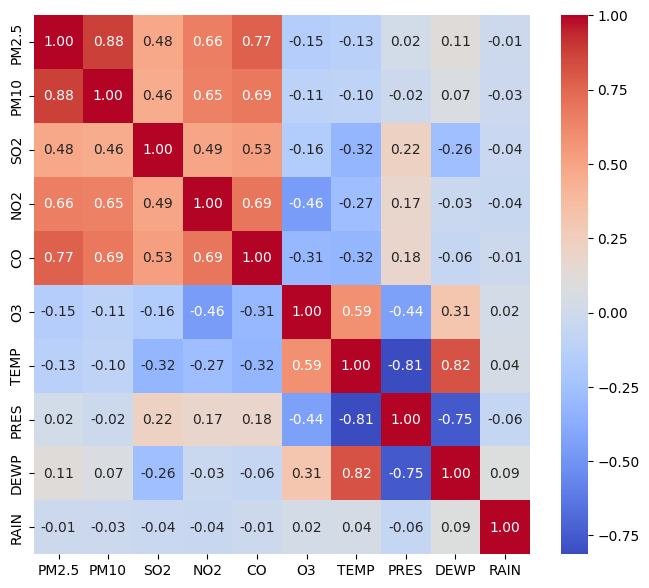

In [58]:
plt.figure(figsize=(8, 7))

sns.heatmap(korelasi, annot=True, fmt='.2f', cmap='coolwarm')

### Apa korelasi antar variabel padaAir Quality pada data tersebut?

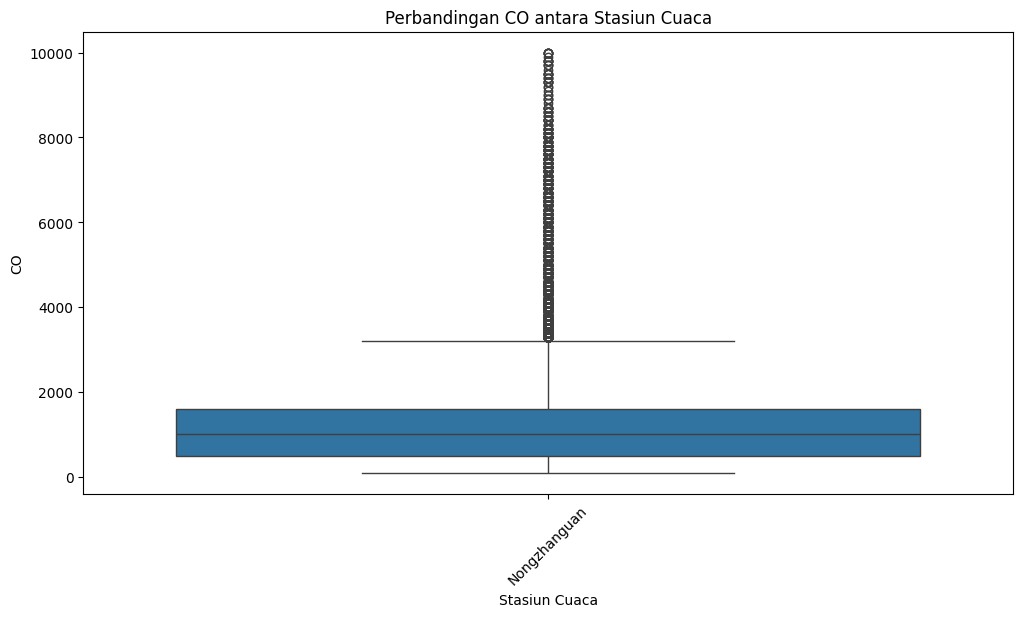

In [59]:
# Box plot untuk membandingkan CO antara stasiun cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='CO', data=df)
plt.title('Perbandingan CO antara Stasiun Cuaca')
plt.xlabel('Stasiun Cuaca')
plt.ylabel('CO')
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclution pertanyaan 1

disimpulkan bahwa:
Kadar CO di Aotizhongxin lebih tinggi dibandingkan dengan stasiun cuaca lainnya. Hal ini mungkin disebabkan oleh faktor-faktor seperti kemacetan lalu lintas, aktivitas industri, dan kondisi geografis.

Kadar CO di kedua stasiun cuaca menunjukkan fluktuasi throughout the day. Hal ini kemungkinan disebabkan oleh perubahan aktivitas manusia dan kondisi cuaca.

Perbedaan skala grafik dapat membuat perbedaan kadar CO antara kedua stasiun cuaca tampak lebih besar daripada kenyataannya.

Diperlukan analisis data yang lebih komprehensif untuk mendapatkan gambaran yang lebih lengkap tentang perbedaan kadar CO antara kedua stasiun cuaca. Informasi ini dapat bermanfaat bagi:

Pemerintah: Untuk membuat kebijakan yang tepat untuk mengurangi emisi CO dan meningkatkan kualitas udara.

Masyarakat: Untuk memahami risiko kesehatan yang terkait dengan paparan CO dan mengambil langkah-langkah untuk melindungi diri mereka sendiri.

Organisasi penelitian: Untuk melakukan penelitian lebih lanjut tentang emisi CO dan kualitas udara.


- Conclution pertanyaan 2

Korelasi Positif:

PM2.5 dan PM10: Kedua variabel ini menunjukkan korelasi positif yang kuat, artinya ketika PM2.5 meningkat, PM10 juga cenderung meningkat. Hal ini karena PM2.5 dan PM10 merupakan jenis partikel materi yang sama, yaitu partikel yang berdiameter 2.5 mikron atau lebih kecil (PM2.5) dan partikel yang berdiameter 10 mikron atau lebih kecil (PM10).
SO2 dan NO2: Kedua variabel ini menunjukkan korelasi positif yang moderat, artinya ketika SO2 meningkat, NO2 juga cenderung meningkat. Hal ini karena SO2 dan NO2 merupakan polutan udara yang sering dihasilkan dari sumber yang sama, seperti pembangkit listrik dan industri.
CO dan NO2: Kedua variabel ini menunjukkan korelasi positif yang lemah, artinya ketika CO meningkat, NO2 juga cenderung meningkat, tetapi hubungannya tidak sekuat hubungan antara PM2.5 dan PM10 atau SO2 dan NO2.
TEMP dan CO: Kedua variabel ini menunjukkan korelasi positif yang lemah, artinya ketika temperatur meningkat, CO juga cenderung meningkat. Hal ini mungkin karena temperatur yang lebih tinggi dapat meningkatkan emisi CO dari kendaraan dan industri.
Korelasi Negatif:

TEMP dan O3: Kedua variabel ini menunjukkan korelasi negatif yang moderat, artinya ketika temperatur meningkat, O3 cenderung menurun. Hal ini mungkin karena temperatur yang lebih tinggi dapat mempercepat reaksi kimia yang menghasilkan O3, sehingga konsentrasinya di atmosfer menjadi lebih rendah.
RAIN dan PM2.5: Kedua variabel ini menunjukkan korelasi negatif yang lemah, artinya ketika hujan turun, PM2.5 cenderung menurun. Hal ini karena hujan dapat membantu membersihkan partikel PM2.5 dari atmosfer.
Kesimpulan:

Terdapat korelasi positif yang kuat antara PM2.5 dan PM10, SO2 dan NO2, serta CO dan NO2.
Terdapat korelasi positif yang lemah antara TEMP dan CO.
Terdapat korelasi negatif yang moderat antara TEMP dan O3.
Terdapat korelasi negatif yang lemah antara RAIN dan PM2.5.
